In [1]:
# library
import nltk
from sklearn import preprocessing
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import os
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import graphviz 
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from nltk.stem.porter import PorterStemmer

In [2]:
###########################
## Stemming and Lemming
## Stemming is different to Lemmatization 
## in the approach it uses to produce root 
## forms of words and the word produced.
##
##  !!! Stemming can result in words
##      That are not actually words. 
##    trouble, troubling, troubled, troubles ....
##    all become troubl

##Lemmatization is the process of grouping together 
##the different inflected forms of a word so they can
## be analysed as a single item. Lemmatization is similar
## to stemming but it brings context to the words. So it 
## links words with similar meaning to one word. 

##############################################################
##
##       A Stemmer is a function that truncates and combines
##       words such as hikings and hikers. 
##
###############################################################


STEMMER=PorterStemmer()

# Use NLTK's PorterStemmer in a function
def MY_STEMMER(str_input):   #I like dogs a lot111 !!"
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()   # I, like, dogs, a
    words = [STEMMER.stem(w) for w in words]
    return words

MyVect_STEM=CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        ##stop_words=["and", "or", "but"],
                        #token_pattern='(?u)[a-zA-Z]+',
                        #token_pattern=pattern,
                        tokenizer=MY_STEMMER,
                        #strip_accents = 'unicode', 
                        lowercase = True
                        )


MyVect_STEM_Bern=CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        ##stop_words=["and", "or", "but"],
                        #token_pattern='(?u)[a-zA-Z]+',
                        #token_pattern=pattern,
                        tokenizer=MY_STEMMER,
                        #strip_accents = 'unicode', 
                        lowercase = True,
                        binary=True    #  0 if the word is not in the doc  and a 1 if it is
                        )



MyVect_IFIDF=TfidfVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        lowercase = True,
                        )

MyVect_IFIDF_STEM=TfidfVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_STEMMER,
                        lowercase = True,
                        )
#


In [3]:


##@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

##################################################################
#############   PART 2 Using the Student Dataset #################
##################################################################

##@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## The student dataset is not text data and so does not need to be 
## vectorized.
## Also, the student dataset is clean. This will not normally
## be the case.

#####################################################################

## Read the data into a dataframe
## DATA: Just numeric and record labeled data
## https://drive.google.com/file/d/1uXtDBIP-dTbFNXbZC0DcCKxIXjocW3xF/view?usp=sharing
## ## There is also another dataset for which the labels are numbers and not words...
## https://drive.google.com/file/d/1g0go050nV02Fibk_9RGpBRGnMwIGQZu5/view?usp=sharing

########################################################################################
filenameNum="/Users/xingyuchen0810/Downloads/text_mining/Module3/StudentSummerProgramData_Numeric_Labeled.csv"
#filenameNum="C:/Users/profa/Documents/Python Scripts/ANLY503/DATA/StudentSummerProgramData_Numeric_NumLabeled.csv"
StudentDF_Num=pd.read_csv(filenameNum)
print(StudentDF_Num.head())
################# Sklearn methods such as these do not run on mixed type data...
#filenameMixed="C:/Users/profa/Documents/Python Scripts/ANLY503/DATA/StudentSummerProgramData_Mixed_Labeled.csv"
#StudentDF_Mix=pd.read_csv(filenameMixed)
#print(StudentDF_Mix.head())

### Because the data is already clean and ready - I can seperate it
## into TRAINING and TESTING sets
####-----------------------------------------------
#from sklearn.model_selection import train_test_split
StudentTrainDF_Num, StudentTestDF_Num = train_test_split(StudentDF_Num, test_size=0.3)
#StudentTrainDF_Mix, StudentTestDF_Mix = train_test_split(StudentDF_Mix, test_size=0.3)

######## Seperate LABELS FROM DATA--------------------
## Make sure you know the name of the label
## For both datasets above  - in this case - it is "Decision"
## TEST - Num
StudentTestLabels_Num=StudentTestDF_Num["Decision"]  ## save labels
print(StudentTestLabels_Num)
StudentTestData_Num = StudentTestDF_Num.drop(["Decision"], axis=1)  ##drop labels
print(StudentTestData_Num)

## TRAIN - Num
StudentTrainLabels_Num=StudentTrainDF_Num["Decision"]  ## save labels
print(StudentTrainLabels_Num)
StudentTrainData_Num = StudentTrainDF_Num.drop(["Decision"], axis=1)  ##drop labels
print(StudentTrainData_Num)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/xingyuchen0810/Downloads/text_mining/Module3/StudentSummerProgramData_Numeric_Labeled.csv'

In [4]:



### TEST - Mixed
#StudentTestLabels_Mix=StudentTestDF_Mix["Decision"]  ## save labels
#print(StudentTestLabels_Mix)
#StudentTestData_Mix = StudentTestDF_Mix.drop(["Decision"], axis=1)  ##drop labels
#print(StudentTestData_Mix)
#
### TRAIN - Mixed
#StudentTrainLabels_Mix=StudentTrainDF_Mix["Decision"]  ## save labels
#print(StudentTrainLabels_Mix)
#StudentTrainData_Mix = StudentTrainDF_Mix.drop(["Decision"], axis=1)  ##drop labels
#print(StudentTrainData_Mix)

#print(StudentTestLabels_Num)
#print(StudentTestData_Num)
### TRAIN - Num
#print(StudentTrainLabels_Num)
#print(StudentTrainData_Num)
###############################################
## SCALE ALL DATA to between 0 and 1
#from sklearn import preprocessing
###########################################################
x = StudentTrainData_Num.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
StudentTrainData_Num_S = pd.DataFrame(x_scaled)

x2 = StudentTestData_Num.values #returns a numpy array
min_max_scaler2 = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler2.fit_transform(x2)
StudentTestData_Num_S = pd.DataFrame(x_scaled2)
print(StudentTestData_Num_S)

NameError: name 'StudentTrainData_Num' is not defined

In [5]:


####################################################################
########################### Naive Bayes ############################
####################################################################
#from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler

############# In Python - unlike R - you cannot run a standard NB on 
## Mixed data. Therefore, we will only run it on our numeric dataset.
##################
MyModelNB_Num= MultinomialNB()

## When you look up this model, you learn that it wants the 
## DF seperate from the labels

MyModelNB_Num.fit(StudentTrainData_Num, StudentTrainLabels_Num)
PredictionNB = MyModelNB_Num.predict(StudentTestData_Num)
#print("\nThe prediction from NB is:")
#print(PredictionNB)
#print("\nThe actual labels are:")
#print(StudentTestLabels_Num)
## confusion matrix
#from sklearn.metrics import confusion_matrix
## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is al[habetical
## The numbers are how many 
cnf_matrix = confusion_matrix(StudentTestLabels_Num, PredictionNB)
print("\nThe confusion matrix is:")
print(cnf_matrix)
### prediction probabilities
## columns are the labels in alphabetical order
## The decinal in the matrix are the prob of being
## that label
print(np.round(MyModelNB_Num.predict_proba(StudentTestData_Num),2))
MyModelNB_Num.get_params(deep=True)

from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
## remap labels to numbers to view
ymap=StudentTrainLabels_Num
ymap=ymap.replace("Admit", 1)
ymap=ymap.replace("Decline", 0)
ymap=ymap.replace("Wait", 2)

pca = PCA(n_components=3)
proj = pca.fit_transform(StudentTrainData_Num)
plt.scatter(proj[:, 0], proj[:, 1], c=ymap, cmap="Paired")
plt.colorbar()


NameError: name 'StudentTrainData_Num' is not defined

In [6]:



#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#########################################################
#############    Decision Trees   #######################
#########################################################
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
## In Python - the Decision Trees work ONLY on numeric data

### TEST
#print(StudentTestLabels_Num)
#print(StudentTestData_Num)
### TRAIN - Num
#print(StudentTrainLabels_Num)
#print(StudentTrainData_Num)

#---------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT_R=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)

## perform DT
MyDT_R.fit(StudentTrainData_Num, StudentTrainLabels_Num)
    ## plot the tree
tree.plot_tree(MyDT_R)

feature_namesR=StudentTrainData_Num.columns
print(feature_namesR)


NameError: name 'StudentTrainData_Num' is not defined

In [7]:



##---
## Show the predictions from the DT on the test set
#print("\nActual\n")
#print(StudentTestLabels_Num)
#print("Prediction\n")
DT_pred_R=MyDT_R.predict(StudentTestData_Num)
#print(DT_pred_R)
##_--
## Show the confusion matrix
bn_matrix_R = confusion_matrix(StudentTestLabels_Num, DT_pred_R)
print("\nThe confusion matrix is:")
print(bn_matrix_R)


NameError: name 'StudentTestData_Num' is not defined

In [8]:



##---
## Feature Importance
FeatureImpR=MyDT_R.feature_importances_   
indicesR = np.argsort(FeatureImpR)[::-1]
indicesR
print ("feature name: ", feature_namesR[indicesR])

## print out the important features.....
for f in range(StudentTrainData_Num.shape[1]):
    if FeatureImpR[indicesR[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indicesR[f], FeatureImpR[indicesR[f]]))
        print ("feature name: ", feature_namesR[indicesR[f]])

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [9]:

## FYI for small datasets you can zip features....
## print(dict(zip(iris_pd.columns, clf.feature_importances_)))
#######-----------------------------------------------------
##  Visualize Decision Trees plotting paired surfaces
##
#####--------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

f1=StudentTrainData_Num.columns.get_loc("WritingScore") 
f2=StudentTrainData_Num.columns.get_loc("TestScore") 

n_classes =2
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[f1, f2], [0, 2], [0, 3],
                                [1, 2], [1, 3]]):
    #print(TrainDF1.iloc[:,pair])
    X = StudentTrainData_Num.iloc[:, pair]
    ## Because we are plotting, using our GOD and HIKE labels will not work
    ## we need to change them to 0 and 1
    y = StudentTrainLabels_Num
    print(y)
    oldy=y
    #print(type(y))
    y=y.replace("Admit", 1)
    y=y.replace("Decline", 0)
    y=y.replace("Wait", 2)
    
    print(y)
    # Train
    DTC = DecisionTreeClassifier().fit(X, y)
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    print(x_min)
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
   
    xx, yy = np.meshgrid(np.arange(x_min, x_max,plot_step),
                         np.arange(y_min, y_max,plot_step))
    
    #print(yy)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
#
    Z = DTC.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(Z)
    
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
       
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=30, label=oldy,edgecolor='black', 
                    #c=color, s=15)
                    #label=y[i],
                    cmap=plt.cm.RdYlBu)
###---------------------------end for loop ----------------------------------
#plt.suptitle("Decision surface of a decision tree using paired features: Student Admissions")
#plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#plt.axis("tight")
#
#plt.figure()

NameError: name 'StudentTrainData_Num' is not defined

In [10]:


# #####################################################
#     #  MORE DT Vis...................................
# ##########################################################
# dot_data2 = StringIO()

# export_graphviz(MyDT_R, out_file=dot_data2,  
#                 filled=True, rounded=True,
#                 special_characters=True,
#                 feature_names = StudentTrainData_Num.columns)

#                 #class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
# graph.write_png('StudentData.png')
# Image(graph.create_png())

In [11]:



#########################################################
##
##                 Random Forest
##
#################################################################


RF1 = RandomForestClassifier()
RF1.fit(StudentTrainData_Num, StudentTrainLabels_Num)
RF1_pred=RF1.predict(StudentTestData_Num)

bn_matrix_RF = confusion_matrix(StudentTestLabels_Num, RF1_pred)
print("\nThe confusion matrix is:")
print(bn_matrix_RF)

################# VIS RF---------------------------------
Features=StudentTrainData_Num.columns
#Targets=StudentTestLabels_Num

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(RF1.estimators_[0],
               feature_names = Features, 
               #class_names=Targets,
               filled = True)

fig.savefig('RF_Tree')  ## creates png


NameError: name 'StudentTrainData_Num' is not defined

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

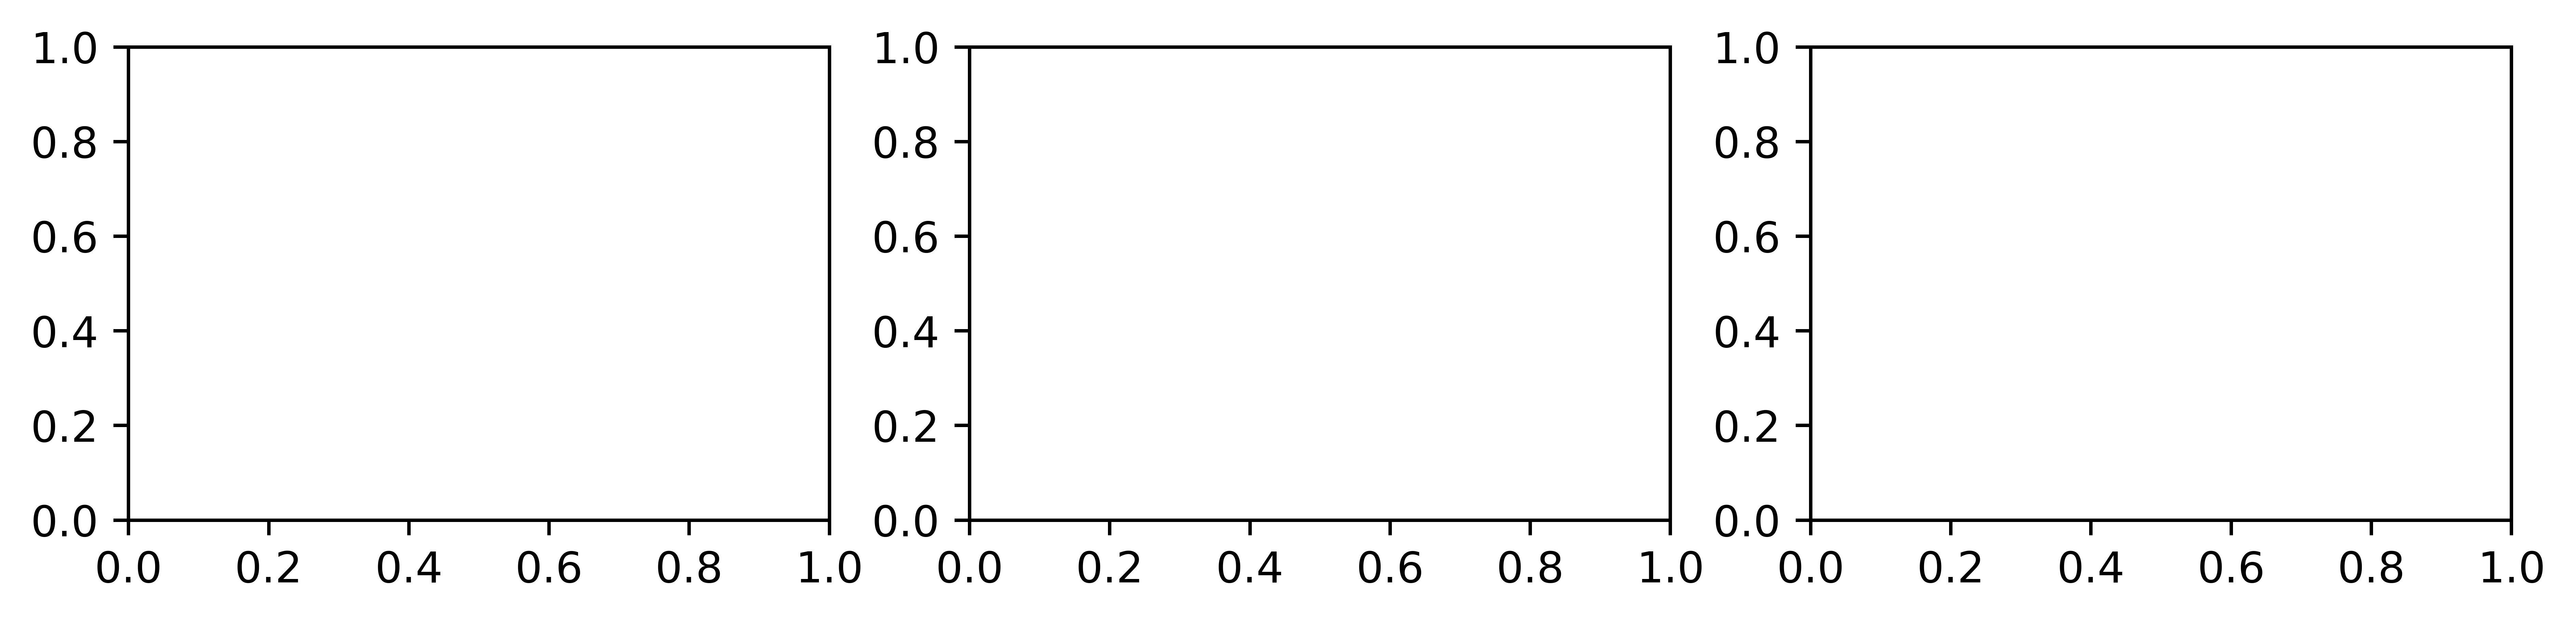

In [12]:

#####------------------> View estimator Trees in RF

fig2, axes2 = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(RF1.estimators_[index],
                   feature_names = Features, 
                   filled = True,
                   ax = axes2[index])

    axes2[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig2.savefig('THREEtrees_RF.png')


In [ ]:

##@@@@@@@@@@@@@@@@@@@@@@@
#############################################
###########  SVM ############################
#############################################
#from sklearn.svm import LinearSVC
### NOTE - We CANNOT use SVM directly on the data. 
### SVMs do not run on qualitative data.
    
############  MUST NORMALIZE THE DATA!!  ################
    ## This is done above. Notice the _S for scale after each DF


##-----


SVM_Model1=LinearSVC(C=1)
SVM_Model1.fit(StudentTrainData_Num_S, StudentTrainLabels_Num)

#print("SVM prediction:\n", SVM_Model1.predict(StudentTestData_Num_S))
#print("Actual:")
#print(StudentTestLabels_Num)

SVM_matrix = confusion_matrix(StudentTestLabels_Num, SVM_Model1.predict(StudentTestData_Num_S))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")


In [13]:


#--------------other kernels
## RBF
SVM_Model2=sklearn.svm.SVC(C=1, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(StudentTrainData_Num_S, StudentTrainLabels_Num)

#print("SVM prediction:\n", SVM_Model2.predict(StudentTestData_Num_S))
#print("Actual:")
#print(StudentTestLabels_Num)

SVM_matrix2 = confusion_matrix(StudentTestLabels_Num, SVM_Model2.predict(StudentTestData_Num_S))
print("\nThe confusion matrix is:")
print(SVM_matrix2)
print("\n\n")

NameError: name 'StudentTrainData_Num_S' is not defined

In [43]:





##------------------------------
## POLY
SVM_Model3=sklearn.svm.SVC(C=100, kernel='poly', degree=2, gamma="auto")
SVM_Model3.fit(StudentTrainData_Num_S, StudentTrainLabels_Num)

#print("SVM prediction:\n", SVM_Model3.predict(StudentTestData_Num_S))
#print("Actual:")
#print(StudentTestLabels_Num)

SVM_matrix3 = confusion_matrix(StudentTestLabels_Num, SVM_Model3.predict(StudentTestData_Num_S))
print("\nThe confusion matrix is:")
print(SVM_matrix3)
print("\n\n")


The confusion matrix is:
[[9 0 1]
 [1 8 0]
 [0 0 8]]



